In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.stats import pearsonr

games = pd.read_csv("cleaned_game.csv")
games.head()

,Unnamed: 0,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,IGN
0,0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,7.5
1,1,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,8.5
2,2,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,7.7
3,3,6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,9.5
4,4,8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E,8.9


In [6]:
call_of_duty = games[games['Name'].str.contains('Call of Duty')]
print(call_of_duty.shape)
call_of_duty.head(10)

(40, 19)


,Unnamed: 0,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,IGN
14,14,29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.04,4.24,0.13,1.32,14.73,88.0,81.0,3.4,8713.0,"Infinity Ward, Sledgehammer Games",M,4.5
15,15,32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.70,3.68,0.11,1.13,14.61,87.0,89.0,6.3,1454.0,Treyarch,M,7.5
16,16,34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.73,0.65,2.42,13.79,83.0,21.0,5.3,922.0,Treyarch,M,9.3
17,17,35,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.24,0.07,1.12,13.67,83.0,73.0,4.8,2256.0,Treyarch,M,9.3
18,18,36,Call of Duty: Modern Warfare 2,X360,2009.0,Shooter,Activision,8.52,3.59,0.08,1.28,13.47,94.0,100.0,6.3,2698.0,Infinity Ward,M,9.5
19,19,37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.73,0.49,1.57,13.32,88.0,39.0,3.2,5234.0,"Infinity Ward, Sledgehammer Games",M,4.5
23,23,41,Call of Duty: Black Ops,PS3,2010.0,Shooter,Activision,5.99,4.37,0.48,1.79,12.63,88.0,58.0,6.4,1094.0,Treyarch,M,7.5
33,33,55,Call of Duty: Modern Warfare 2,PS3,2009.0,Shooter,Activision,4.99,3.64,0.38,1.60,10.60,94.0,67.0,6.3,2073.0,Infinity Ward,M,9.5
35,35,60,Call of Duty: Ghosts,X360,2013.0,Shooter,Activision,6.73,2.56,0.04,0.91,10.25,73.0,29.0,2.6,2117.0,Infinity Ward,M,8.8
43,43,69,Call of Duty: Ghosts,PS3,2013.0,Shooter,Activision,4.10,3.63,0.38,1.25,9.36,71.0,10.0,2.6,1047.0,Infinity Ward,M,8.8


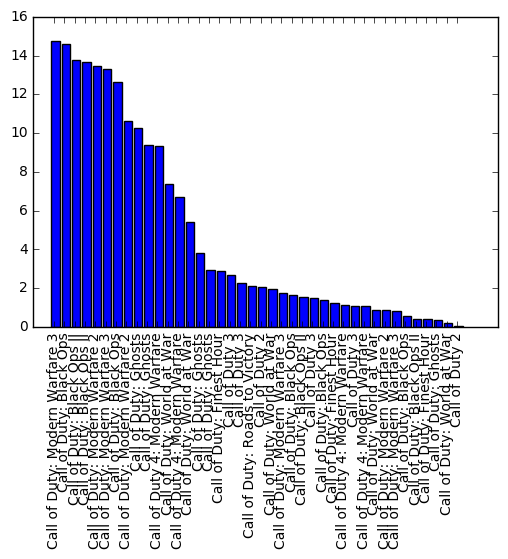

In [7]:
fig, ax = plt.subplots()
bar_positions =np.arange(1,41) + .75
tick_positions = np.arange(1,41) + 1
bar_heights = call_of_duty['Global_Sales'].values
ax.bar(bar_positions, bar_heights)
ax.set_xticks(tick_positions)
ax.set_xticklabels(call_of_duty['Name'].values, rotation=90)
plt.show()

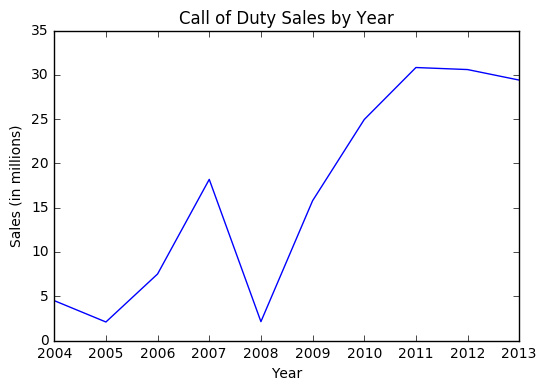

0.867506614722 0.000540502355067


In [30]:
cod_year = call_of_duty.sort_values('Year_of_Release', axis=0)
# We need to loop through each game and add together the total amount
cod_games = cod_year['Name'].unique()
cod_total_sales = []
for game in cod_games:
    g_df = cod_year[cod_year['Name'] == game]
    cod_total_sales.append(g_df['Global_Sales'].sum())
fig, ax = plt.subplots()
ax.plot(cod_year['Year_of_Release'].unique(), cod_total_sales)
ax.set_xticklabels(cod_year['Year_of_Release'].unique().astype(int))
ax.set_xlabel('Year')
ax.set_ylabel('Sales (in millions)')
ax.set_title('Call of Duty Sales by Year')
plt.savefig('cod_sales_year.png', bbox_inches='tight')
plt.show()
r, p = pearsonr(cod_total_sales[0:11], range(2003,2014))
print(r, p)

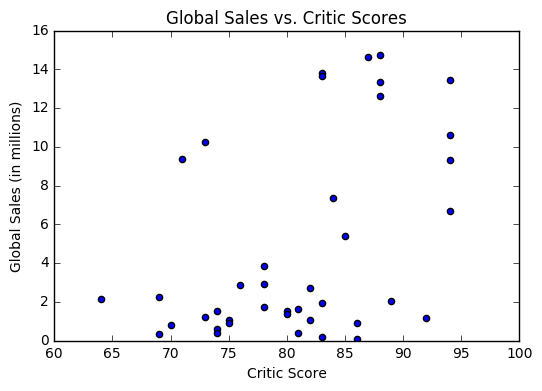

In [9]:
fig, ax = plt.subplots()
ax.scatter(call_of_duty['Critic_Score'], call_of_duty['Global_Sales'])
ax.set_xlabel("Critic Score")
ax.set_ylabel('Global Sales (in millions)')
ax.set_title('Global Sales vs. Critic Scores')
ax.set_ylim(0, 16)
plt.savefig('cod_sales.png', bbox_inches='tight')
plt.show()

In [10]:
popular_games = games[games['Global_Sales'] >= 1]

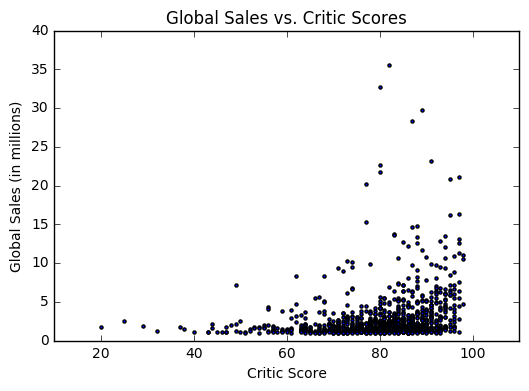

In [11]:
fig, ax = plt.subplots()
ax.scatter(popular_games['Critic_Score'], popular_games['Global_Sales'], 5)
ax.set_xlabel("Critic Score")
ax.set_ylabel('Global Sales (in millions)')
ax.set_title('Global Sales vs. Critic Scores')
ax.set_ylim(0, 40)
plt.savefig('popular_sales.png', bbox_inches='tight')
plt.show()

In [51]:
r, p_value = pearsonr(popular_games['Critic_Score'], popular_games['Global_Sales'])
print(r, p_value)
r, p_value = pearsonr(games['Critic_Score'], games['Global_Sales'])
print(r, p_value)

0.181963210503 2.45587531881e-09
0.251584984393 6.91154978924e-85


That's a weak correlation, but maybe there is something we can learn from reviews. The question is, does the amount of people that review a game influence the amount of money they make?

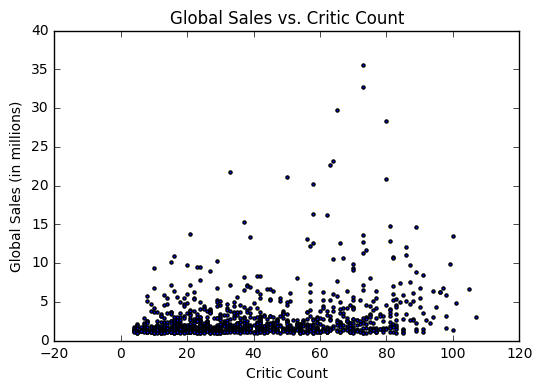

In [13]:
fig, ax = plt.subplots()
ax.scatter(popular_games['Critic_Count'], popular_games['Global_Sales'], 5)
ax.set_xlabel("Critic Count")
ax.set_ylabel('Global Sales (in millions)')
ax.set_title('Global Sales vs. Critic Count')
ax.set_ylim(0, 40)
plt.savefig('popular_sales2.png', bbox_inches='tight')
plt.show()

In [14]:
r, p_value = pearsonr(popular_games['Critic_Count'], popular_games['Global_Sales'])
print(r, p_value)

0.212174869447 3.03540789308e-12


So it appears that critics knowing about and reviewing a game might have a slight impact on that games performance, but it's barely distinguishable from the other correlation. But the real question is, if people go to review a game (users that is) more often, does that say something about the sales of the game?

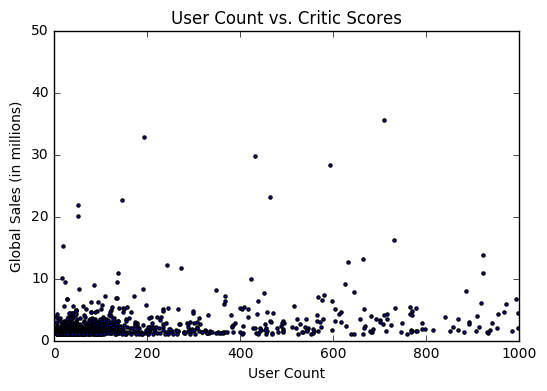

In [15]:
fig, ax = plt.subplots()
ax.scatter(popular_games['User_Count'], popular_games['Global_Sales'], 5)
ax.set_xlabel("User Count")
ax.set_ylabel('Global Sales (in millions)')
ax.set_title('User Count vs. Critic Scores')
ax.set_xlim(0, 1000)
ax.set_ylim(0, 50)
plt.savefig('popular_sales3.png', bbox_inches='tight')
plt.show()

It looks like the amount of reviews users make has very little to do with the amount of sales the game makes. Let's just make sure that it's the case by getting the correlation.

In [16]:
r, p = pearsonr(popular_games['User_Count'], popular_games['Global_Sales'])
r

nan

It appears that we can't get the r value because some of the values in that column are not numbers. We would have to clena that up. But I have to ask the question, which console sells the best? Let's find out by looking into the numbers.

In [17]:
platforms = popular_games['Platform'].unique()
platform_dfs = {}
platforms_2 = []
for p_name in platforms:
    p_df = popular_games[popular_games['Platform'] == p_name]
    if (p_df.shape[0] > 40):
        platform_dfs[p_name] = p_df
        platforms_2.append(p_name)
print(len(platform_dfs))

7


Wii : Correlation (Pearson's R):  0.164493413491 
Number of games:  101
DS : Correlation (Pearson's R):  0.305528368444 
Number of games:  72
PS3 : Correlation (Pearson's R):  0.346744575742 
Number of games:  187
PS2 : Correlation (Pearson's R):  0.317917011632 
Number of games:  232
X360 : Correlation (Pearson's R):  0.390130057999 
Number of games:  189
3DS : Correlation (Pearson's R):  0.358134380938 
Number of games:  48
PS4 : Correlation (Pearson's R):  0.297332079471 
Number of games:  41


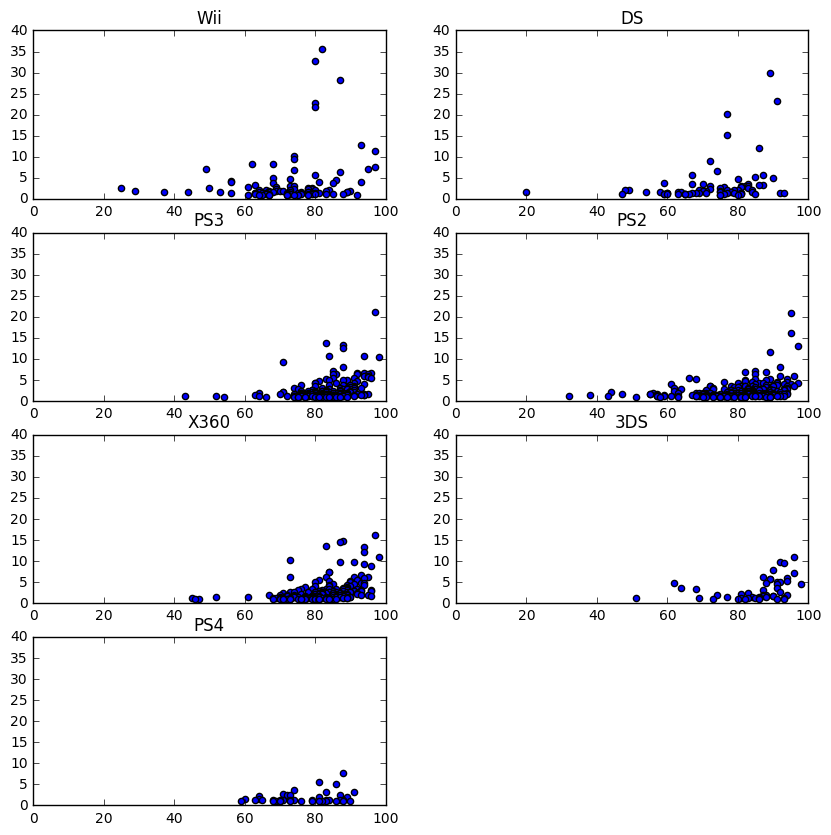

In [18]:
fig = plt.figure(figsize=(10,10))
for i in range(0, len(platforms_2)):
    platform_df = platform_dfs[platforms_2[i]]
    ax = fig.add_subplot(4,2,i+1)
    ax.scatter(platform_df['Critic_Score'], platform_df['Global_Sales'])
    ax.set_xlim(0,100)
    ax.set_ylim(0,40)
    ax.set_title(platforms[i])
    r, p = pearsonr(platform_df['Critic_Score'], platform_df['Global_Sales'])
    print(platforms[i], ': Correlation (Pearson\'s R): ', r, '\nNumber of games: ', platform_df.shape[0])
    
plt.show()

We noticed that for the CoD sequels, we see better sales almost every year. So if we really wanted to predict the sales of a game, we should maybe see if we can find all of the games that have sequels. Figuring out a way to do this might be a little hard though, because we have to break things up automatically in a way that excludes things that repeat in other names that have no relation to it, like 'the' and 'a' and the such. First thing we can do, though, is work to rearrange all of the games. This time we're going to use more than just the games that make over $1 million, though. Let's include them all!

In [33]:
games.sort_values("Name", inplace=True)
games.head(10)

,Unnamed: 0,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,IGN
1885,1885,3757,007 Racing,PS,2000.0,Racing,Electronic Arts,0.30,0.20,0.00,0.03,0.53,51.0,16.0,4.6,14.0,Eutechnyx,T,5.0
4664,4664,11274,1 vs. 100,DS,2008.0,Misc,DSI Games,0.08,0.00,0.00,0.01,0.08,38.0,5.0,3.2,5.0,ECI,E,4.5
3509,3509,7784,101-in-1 Explosive Megamix,DS,2008.0,Puzzle,Nordcurrent,0.05,0.12,0.00,0.02,0.19,46.0,13.0,tbd,NaN,Nordcurrent,E,2.5
2793,2793,5925,1701 A.D.,PC,2006.0,Simulation,Deep Silver,0.00,0.25,0.00,0.04,0.30,79.0,30.0,8.3,38.0,Related Designs,E10+,8.2
5201,5201,13303,2002 FIFA World Cup,GC,2002.0,Sports,Electronic Arts,0.04,0.01,0.00,0.00,0.05,78.0,9.0,7.7,6.0,EA Sports,E,9.3
1719,1719,3395,2002 FIFA World Cup,PS2,2002.0,Sports,Electronic Arts,0.21,0.17,0.16,0.06,0.59,73.0,19.0,5.6,18.0,EA Sports,E,9.3
3523,3523,7821,2002 FIFA World Cup,XB,2002.0,Sports,Electronic Arts,0.14,0.04,0.00,0.01,0.19,79.0,17.0,9,4.0,Software Creations,E,9.3
1247,1247,2429,2010 FIFA World Cup South Africa,X360,2010.0,Sports,Electronic Arts,0.32,0.42,0.02,0.09,0.85,83.0,61.0,8.1,58.0,Electronic Arts,E,6.0
2254,2254,4579,2010 FIFA World Cup South Africa,Wii,2010.0,Sports,Electronic Arts,0.23,0.15,0.01,0.04,0.42,70.0,19.0,6.7,11.0,Electronic Arts,E,6.0
2100,2100,4211,2010 FIFA World Cup South Africa,PSP,2010.0,Sports,Electronic Arts,0.09,0.22,0.03,0.12,0.46,69.0,11.0,7.4,9.0,Electronic Arts,E,6.0


Now it's time to start really try to put them together. The problem is getting rid of the extra words that aren't meaningful, then deciding what length of the title we have to work through and decide what is a full title and what isn't (i.e. there are many Star Wars games, but not all of them are a part of the same series). But I'm going to leave this part for another time, since it will require me to learn a few different techniques, and I'm trying to work on other skills right now. I'll hopefully come back to that.

One question is what system sells the most games. We can look at it a few ways. We can look at the cumulative amount of money that a system makes for their game, or we can see on average, how much a game sells for a given system. Let's start with compiling that information that we need. Then we can create a bar graph that represents that.

In [35]:
platforms = games['Platform'].unique()
platform_total = {}
platform_avg = {}
for plat in platforms:
    plat_df = games[games['Platform'] == plat]
    platform_total[plat] = plat_df['Global_Sales'].sum()
    platform_avg[plat] = plat_df['Global_Sales'].mean()

196.56000000000014 1.2763636363636373
361.81999999999994 0.6878707224334599
144.92 0.3130021598272138
144.53 0.391680216802168
843.85 0.8006166982922202
202.49000000000007 0.33580431177446113
755.7900000000005 1.0615028089887648
593.9599999999999 1.3258035714285712
160.76 0.45541076487252125
702.8700000000001 1.1282022471910114
118.50999999999996 0.3798397435897435
25.62 1.0675000000000001
42.35999999999999 1.4606896551724136
82.88000000000001 1.1840000000000002
17.479999999999997 0.37999999999999995
36.3 1.0083333333333333
3.6699999999999995 0.36699999999999994


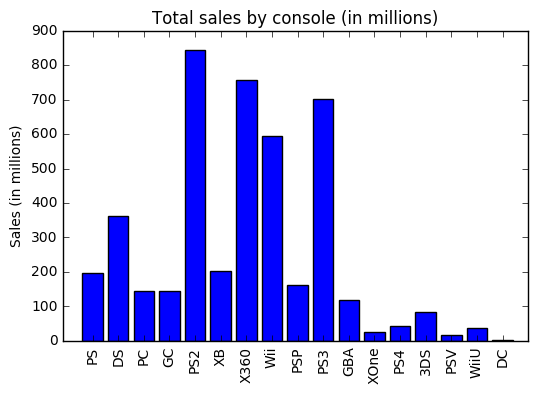

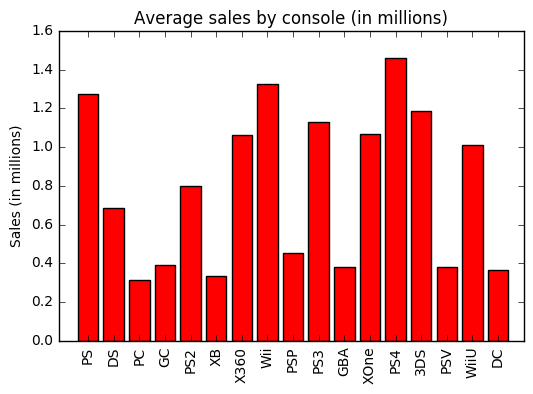

In [50]:
fig, ax = plt.subplots()
bar_positions = np.arange(0,17) + .75
tick_positions = np.arange(0,18) + 1.15
bar_heights = [platform_total[i] for i in platforms]
avg_heights = [platform_avg[i] for i in platforms]
ax.bar(bar_positions, bar_heights)
ax.set_xticks(tick_positions)
ax.set_xticklabels(platforms, rotation=90)
ax.set_ylabel('Sales (in millions)')
ax.set_title('Total sales by console (in millions)')
plt.savefig('console_totals.png', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots()
ax.bar(bar_positions, avg_heights, color='r')
ax.set_xticks(tick_positions)
ax.set_xticklabels(platforms, rotation=90)
ax.set_ylabel('Sales (in millions)')
ax.set_title('Average sales by console (in millions)')
plt.savefig('console_avgs.png', bbox_inches='tight')
plt.show()